# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'BC3C'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 90)


,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B12,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,...,MOAR010_BC3C_24H:K09,MOAR010_BC3C_24H:L19,MOAR010_BC3C_24H:L21,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:F07,MOAR011_BC3C_24H:F08
Androgen,-0.064393,-0.023087,-0.000702,-0.044655,-0.003758,0.016581,-0.000960,0.033767,0.017160,0.020628,...,-0.044253,0.003331,0.033882,0.002626,0.024800,0.003295,-0.035689,-0.003890,-0.041062,0.047049
CDK1,-0.474178,-0.465530,0.258901,-0.184484,0.224675,-0.376195,0.197394,0.203473,-0.084174,0.210600,...,-0.002954,-0.003745,0.001662,0.012325,-0.170188,0.100717,-0.029292,0.092654,-0.500959,0.131844
CDK2,-0.195326,-0.172657,-0.033362,-0.010694,-0.002057,-0.020852,0.009705,-0.035582,-0.029857,0.026029,...,-0.017494,0.020209,-1.010310,-0.008445,0.004099,0.004567,-0.015628,0.028200,-0.051533,-0.026693
CDK4_6,-0.495571,-0.482552,-0.306154,-0.179866,0.047184,-0.003137,-0.020293,-0.052012,-0.053463,-0.222897,...,-0.074587,0.014086,0.085944,-0.105570,-0.152127,0.004238,-0.285189,-0.156482,-0.613715,0.065480
EGFR,0.569539,0.450394,0.220490,0.232709,0.144885,0.056756,-0.345657,0.039314,0.276951,0.098512,...,-0.074457,-0.119789,-0.540804,0.100276,-0.078087,-0.009004,0.018657,-0.145720,-0.920323,-0.377519
Estrogen,-0.199919,-0.259932,-0.142580,-0.448592,-0.660614,-0.342791,0.009855,-0.127598,-0.167668,-0.110130,...,0.075279,0.108917,0.133747,0.025976,0.050806,-0.011542,0.030152,0.136822,-1.133919,-0.168358
FGFR,-0.161304,-0.082174,-0.119207,0.024376,-0.003728,-0.461110,-0.042683,-0.142490,0.033345,0.006284,...,0.163097,0.054862,-0.107181,-0.073578,0.011335,-0.113435,-0.117198,-0.089919,-0.602810,-0.036339
PI3K,-1.858456,-1.610594,-1.463343,-1.270820,-0.588271,0.268959,0.068152,-0.611527,-0.574680,-0.552304,...,0.127440,-0.130170,0.297385,-0.049975,0.073918,-0.196519,-0.025370,0.251962,-0.272569,0.379042
p53,0.024887,-0.102213,-0.084487,-0.359168,-0.053668,-1.654839,-1.496443,-1.769525,-0.157457,-0.036249,...,-1.559420,-0.213166,-0.011086,0.117921,0.008804,0.144338,0.066361,0.227497,-0.247053,-0.044037
TOP2A,-0.091287,0.103722,-0.252186,-0.145433,-0.117631,0.055866,0.076575,-0.038253,-1.995442,-0.201716,...,0.195364,-0.458269,0.351832,0.149486,0.161428,-0.089586,-0.653632,0.082104,-0.669834,0.081584


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-32.29022953772266
19.755130612438


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 90)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
Androgen,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [9]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [10]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [11]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.001002,0.000000,0.000000,0.827467,0.000000,0.000000,0.107508,0.003428,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.000000,1.000000,1.000000,0.013565,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,0.000000,0.000000,0.003102,0.000000,0.000000,0.050837,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.000000,1.000000,1.000000,0.087124,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0
p53,0.0,0.000193,0.000000,0.000000,1.000000,0.000000,0.000096,0.053554,0.000000,0.848513,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,3.164311e-02,0.000000,0.000000e+00,3.778427e-01,0.000000e+00,0.000000e+00,3.097581e-01,0.058449,0.000000e+00,0.0,0.0,0.0
CDK1,0.0,0.000000e+00,0.000000,2.664535e-15,2.664535e-15,1.156776e-01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0
CDK2,0.0,0.000000e+00,0.000000,0.000000e+00,5.560971e-02,0.000000e+00,0.000000e+00,2.196650e-01,0.000000,0.000000e+00,0.0,0.0,0.0
CDK4_6,0.0,1.776357e-15,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.776357e-15,1.776357e-15,0.000000,0.000000e+00,0.0,0.0,0.0
EGFR,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0
Estrogen,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.661338e-16,6.661338e-16,0.000000,0.000000e+00,0.0,0.0,0.0
FGFR,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0
PI3K,0.0,0.000000e+00,0.000000,4.440892e-16,4.440892e-16,2.820162e-01,0.000000e+00,0.000000e+00,0.000000,4.440892e-16,0.0,0.0,0.0
p53,0.0,1.390238e-02,0.000000,0.000000e+00,3.330669e-16,0.000000e+00,9.788472e-03,2.251358e-01,0.000000,3.585230e-01,0.0,0.0,0.0
TOP2A,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.554312e-15,0.000000,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000021,0.00000,0.000000,-0.034606,0.000000,0.000000,0.002952,0.000082,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.00000,0.492915,0.129625,0.002330,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,0.00000,0.000000,0.000145,0.000000,0.000000,0.001921,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.175769,0.00000,0.000000,0.000000,0.000000,0.161974,0.219898,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.308478,-0.288591,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.338733,0.161544,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.00000,0.352781,0.391299,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.00000,0.551835,-0.186034,0.019807,0.000000,0.000000,0.000000,0.442942,0.0,0.0,0.0
p53,0.0,0.000013,0.00000,0.000000,0.204805,0.000000,-0.000011,0.006518,0.000000,0.242423,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.219369,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000678,0.000000,0.000000,0.021103,0.000000,0.000000,0.008726,0.001558,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.000000,0.040675,0.023760,0.020152,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,0.000000,0.000000,0.002654,0.000000,0.000000,0.008373,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.019698,0.000000,0.000000,0.000000,0.000000,0.020009,0.014048,0.000000,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.034099,0.015416,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.014681,0.010424,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.000000,0.012286,0.007526,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.000000,0.059051,0.027251,0.065264,0.000000,0.000000,0.000000,0.042415,0.0,0.0,0.0
p53,0.0,0.000968,0.000000,0.000000,0.044852,0.000000,0.001121,0.028340,0.000000,0.122249,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002041,0.000000,0.000000,0.0,0.0,0.0


In [12]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.001183,-3.347005e-17,0.006614,-0.042557,0.000370,-0.011931,0.018556,8.194753e-05,0.008239,2.176968e-16,1.239613e-16,-4.600641e-18
CDK1,1.003994e-16,1.117118,-5.248947e-17,0.666320,0.191876,0.004619,0.168680,0.101785,-2.508160e-16,0.045085,-9.978971e-17,-9.917989e-17,4.342870e-16
CDK2,1.251438e-16,0.000292,1.000000e+00,0.001663,-0.000217,0.000052,0.000220,0.002612,8.629486e-16,0.001157,-2.314391e-16,5.578564e-16,-1.887362e-16
CDK4_6,2.212348e-16,0.242727,-1.435917e-16,1.380942,0.069639,0.006811,0.247466,0.315307,-6.166295e-17,0.139663,5.410984e-16,2.831537e-16,-2.790774e-16
EGFR,1.120988e-17,-0.020400,3.944048e-16,-0.116062,1.212979,-0.008317,0.352561,-0.417486,1.421977e-16,-0.184922,-7.813219e-16,-1.594103e-16,1.536573e-16
Estrogen,-1.462795e-16,0.051129,-1.615297e-16,0.290886,0.136079,1.004220,0.429256,0.207037,-1.669762e-16,0.091705,-4.946670e-16,3.400873e-17,6.430139e-16
FGFR,2.200471e-17,0.077647,6.212259e-18,0.441755,0.499204,-0.000852,1.225258,-0.052127,6.828081e-17,-0.023089,-3.086538e-16,7.829230e-17,-3.047200e-16
PI3K,1.282439e-16,0.153686,-4.008638e-16,0.874366,-0.204391,0.027908,0.088028,1.390917,-8.530126e-16,0.616096,1.939466e-16,-4.764353e-16,4.581547e-17
p53,-8.595613e-18,0.005011,-1.595301e-17,0.028432,0.236220,-0.000037,0.077450,-0.002466,1.000000e+00,0.241331,8.077388e-17,1.741109e-16,-5.165408e-17
TOP2A,2.832374e-17,0.033714,-5.796609e-17,0.191809,-0.044837,0.006122,0.019311,0.305124,-6.507133e-16,1.135152,1.524193e-16,1.112441e-16,1.279509e-16


In [13]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK1,Androgen,0.000021
1,EGFR,Androgen,-0.034606
2,PI3K,Androgen,0.002952
3,p53,Androgen,0.000082
4,CDK4_6,CDK1,0.492915
5,EGFR,CDK1,0.129625
6,Estrogen,CDK1,0.002330
7,EGFR,CDK2,0.000145
8,PI3K,CDK2,0.001921
9,CDK1,CDK4_6,0.175769


In [14]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.0,0.000000,-0.034606,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.0,0.492915,0.129625,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.175769,0.0,-1.000000,0.000000,0.000000,0.161974,0.219898,0.0,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,0.000000,-1.000000,0.000000,0.308478,-0.288591,0.0,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.0,0.000000,0.000000,-1.000000,0.338733,0.161544,0.0,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.352781,0.391299,0.000000,-1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.0,0.551835,-0.186034,0.000000,0.000000,-1.000000,0.0,0.442942,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.204805,0.000000,0.000000,0.000000,-1.0,0.242423,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.219369,0.0,-1.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.001183,-3.347005e-17,0.006614,-0.042557,0.000370,-0.011931,0.018556,8.194753e-05,0.008239,2.176968e-16,1.239613e-16,-4.600641e-18
CDK1,1.003994e-16,1.117118,-5.248947e-17,0.666320,0.191876,0.004619,0.168680,0.101785,-2.508160e-16,0.045085,-9.978971e-17,-9.917989e-17,4.342870e-16
CDK2,1.251438e-16,0.000292,1.000000e+00,0.001663,-0.000217,0.000052,0.000220,0.002612,8.629486e-16,0.001157,-2.314391e-16,5.578564e-16,-1.887362e-16
CDK4_6,2.212348e-16,0.242727,-1.435917e-16,1.380942,0.069639,0.006811,0.247466,0.315307,-6.166295e-17,0.139663,5.410984e-16,2.831537e-16,-2.790774e-16
EGFR,1.120988e-17,-0.020400,3.944048e-16,-0.116062,1.212979,-0.008317,0.352561,-0.417486,1.421977e-16,-0.184922,-7.813219e-16,-1.594103e-16,1.536573e-16
Estrogen,-1.462795e-16,0.051129,-1.615297e-16,0.290886,0.136079,1.004220,0.429256,0.207037,-1.669762e-16,0.091705,-4.946670e-16,3.400873e-17,6.430139e-16
FGFR,2.200471e-17,0.077647,6.212259e-18,0.441755,0.499204,-0.000852,1.225258,-0.052127,6.828081e-17,-0.023089,-3.086538e-16,7.829230e-17,-3.047200e-16
PI3K,1.282439e-16,0.153686,-4.008638e-16,0.874366,-0.204391,0.027908,0.088028,1.390917,-8.530126e-16,0.616096,1.939466e-16,-4.764353e-16,4.581547e-17
p53,-8.595613e-18,0.005011,-1.595301e-17,0.028432,0.236220,-0.000037,0.077450,-0.002466,1.000000e+00,0.241331,8.077388e-17,1.741109e-16,-5.165408e-17
TOP2A,2.832374e-17,0.033714,-5.796609e-17,0.191809,-0.044837,0.006122,0.019311,0.305124,-6.507133e-16,1.135152,1.524193e-16,1.112441e-16,1.279509e-16


In [15]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

129

In [16]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

27

### Visualization

In [17]:
df_subset=rm_filt_minus_inv[[ 'CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]
df_subset = df_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]

In [18]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of BC3C cell line under conditions ')

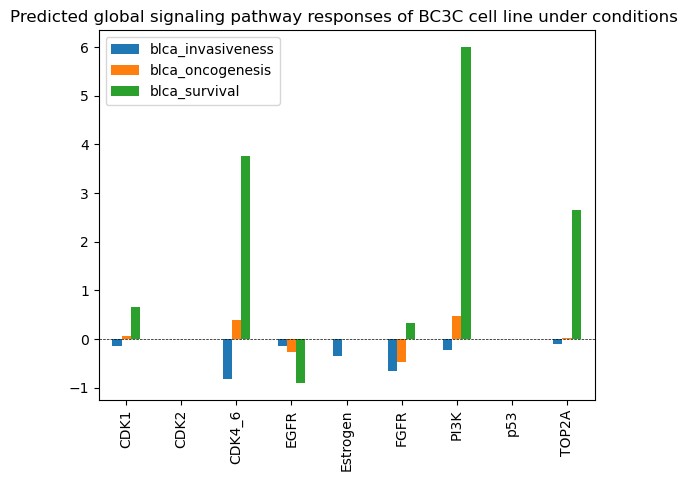

In [19]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [20]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.0,0.000000,-0.034606,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.0,0.492915,0.129625,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.175769,0.0,-1.000000,0.000000,0.000000,0.161974,0.219898,0.0,0.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,0.000000,-1.000000,0.000000,0.308478,-0.288591,0.0,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.000000,0.0,0.000000,0.000000,-1.000000,0.338733,0.161544,0.0,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.352781,0.391299,0.000000,-1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
PI3K,0.0,0.000000,0.0,0.551835,-0.186034,0.000000,0.000000,-1.000000,0.0,0.442942,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.204805,0.000000,0.000000,0.000000,-1.0,0.242423,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.219369,0.0,-1.000000,0.0,0.0,0.0


In [21]:
rm_subset=rm_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_invasiveness,blca_oncogenesis,blca_survival
CDK1,0.000000,0.000000,0.000000
CDK2,0.000000,0.000000,0.000000
CDK4_6,-0.404348,0.265090,0.000000
EGFR,0.090547,0.000000,0.000000
Estrogen,-0.353477,0.000000,0.000000
FGFR,-0.360107,-0.458151,0.000000
PI3K,0.000000,0.304876,4.330725
p53,0.000000,0.000000,0.000000
TOP2A,0.000000,-0.193813,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of BC3C cell line under conditions ')

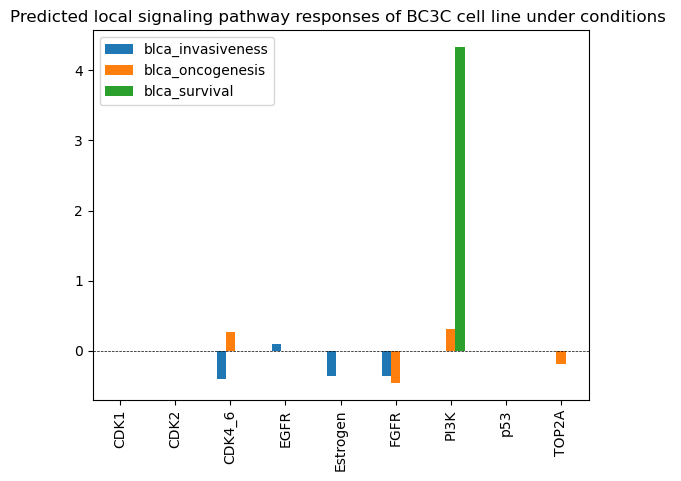

In [22]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")